# Manejo de vectores y matrices en Python: Módulo Numpy Parte 1

![numpy_img.png](https://raw.githubusercontent.com/numpy/numpy/main/branding/logo/primary/numpylogodark.png)

## Introducción

Los vectores o arrays multidimensionales y matrices constituyen un pilar fundamental en el desarrollo de soluciones computacionales relacionadas con operaciones numéricas. Cuando la información es representada en esta forma entonces se dice que está "*vectorizada*".
Una de las grandes ventajas de la computación vectorial es que en gran medida elimina la necesidad de usar ciclos *explícitamente*. O sea, las operaciones entre vectores son realizadas en un nivel más bajo de programación el cual suele ser mucho más eficiente. Esto evita utilizar una de las grandes desventajas de un lenguaje *interpretado* como lo es Python: estructuras de control iterativas. 

Por ejemplo, supongamos que se desea realizar la suma de dos vectores (*seudo-código*):
```python
a = [1, 2, 3, 4, 5]
b = [5, 4, 3, 2, 1]
```

La suma podría realizarse iterando por cada uno de los correspondientes elementos de los vectores utilizando un ciclo:
```c
c = [0, 0, 0, 0, 0]
for i=0 to i=len(a) do i+= 1:
    c[i] = a[i] + b[i]
print c
```
El resultado es:
```python
c = [6, 6, 6, 6, 6]
```
En este caso ```a, b, c``` no tienen por que ser vectores. Podían ser listas u otra estructura de datos secuencial mutable.

El hecho de haber iterado por cada uno de los elementos implica que las instrucciones que se encuentran dentro del ciclo son interpretadas por el compilador de Python en cada iteración, realizando el proceso de compilación pertinente en cada caso. Esto es verdaderamente lento pero necesario en un lenguaje interpretado como este.

Ahora, usando operationes vectorizadas entonces el pseudo-código quedaría de la siguiente forma:
```python
c = a + b
```
El resultado es el mismo que en el caso anterior pero
1.   el código muestra de forma más clara cuál es la operación que se está realizando;
2.   el operador suma no realiza directamente la suma por cada iteración como en el primer ejemplo porque se encuentra redefinido para que la misma se realice an un nivel más bajo y de forma más eficiente;
3.   el resultado de la operación es directamente un nuevo vector que contiene los valores de la suma por elementos. 

Luego, una regla importante para realizar operaciones vectoriales es:
 
**evitar los ciclos explícitos**.

## Módulo NumPy

En el ambiente de computación científica en Python ya existen estructuras de datos vectorizadas y eficientes para el trabajo con vectores y matrices, las cuales son proporcionadas por la biblioteca **NumPy**. Su núcleo se encuentra implementado en lenguaje C y provee de herramientas eficientes para el manejo de vectores y matrices. 

Una de las razones por las que sus operaciones con vectores y matrices son más eficientes es que, por ejemplo, en el caso de los vectores, estos son estructuras de datos homogéneas y tipadas de tamaño fijo. Esto quiere decir que los elementos que lo conforman tienen que ser del mismo tipo de dato y el tamaño del vector no puede ser cambiado sin tener que obligatoriamente crear uno nuevo. Esto le permite ser mucho más eficiente que las lsitas de Python. Adicionalmente, NumPy provee operaciones más complejas de forma eficiente para resolver problemas del Álgebra Lineal o la Transformada Rápida de Fourier entre otros.

Para hacer uso del la biblioteca NumPy se debe importar de la siguiente forma:

In [1]:
import numpy as np

Para más referencias acerca de esta biblioteca puede consultar el sitio [https://numpy.org](https://numpy.org).

## El objeto Array del módulo NumPy

La estructura de dato ```ndarray``` es implementada en NumPy para representar vectores multidimensionales. Es una de las estructuras de datos más importantes y básicas para desarrollar soluciones computacionales numéricas.

La misma contiene importante metadata acerca del vector en la forma de los siguientes atributos:

Atributos     |    Descripción
--------------|-------------------------------------
```shape```   | Retorna una Tupla que contiene el tamaño de cada dimensión del array
```size```    | Cantidad total de elementos que contiene el vector
```ndim```    | Número de dimensiones definidas en el vector
```nbytes```  | Número de bytes utilizados para almacenar el vetor en memoria
```dtype```   | El tipo de datos de sus elementos

Véase el siguiente ejemplo:


In [2]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("El nombre de la clase es: ", type(matrix))

El nombre de la clase es:  <class 'numpy.ndarray'>


In [3]:
matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [4]:
matrix.ndim

2

In [5]:
matrix.shape

(3, 3)

In [6]:
matrix.size

9

In [7]:
matrix.dtype

dtype('int64')

In [8]:
matrix.nbytes

72

* Note que el tamaño en memoria ```matrix.nbytes = 72``` corresponde con 8 bytes por cada uno de los elementos de la matriz dado que el tipo ```int64``` requiere 8 bytes.

### Tipos de datos

Como fue ilustrado en el ejemplo, cada elemento de un vector está representado en un tipo de dato determinado cumpliendo que es exactamente el mismo para todos en el mismo vector. Seguidamente presentamos los tipos de datos existentes y sus variantes:

```dtype```       | Variante                            | Descripción
------------------|-------------------------------------|----------------------------
**int**           | int8, int16, int32, int64           | Números enteros
**uint**          | uint8, uint16, uint32, uint64       | Números enteros sin signo(No negativos)
**bool**          | bool                                | Tipo booleano (Sí o No)
**float**         | float16, float32, float64, float128 | Números reales (de punto flotante) 
**complex**       | complex64, complex128, complex256   | Numeros complejos (de punto flotante)

En dependencia del grado de precisión con que se desee trabajar se pueden escoger los tipos de datos adecuados para los vectores. Los tipos de datos por defecto son: ```int64, uint64, float64, complex128```.

Veamos algunos ejemplos:

In [9]:
a = np.array([1, 2, 3, 4], dtype="int8")
b = np.array([1, 2, 3, 4], dtype="float")
c = np.array([1.0 + 0.0j, 2.0 + 0.0j, 3.0 + 0.0j], dtype="complex")

print(a, a.dtype)
print(b, b.dtype)
print(c, c.dtype)

[1 2 3 4] int8
[1. 2. 3. 4.] float64
[1.+0.j 2.+0.j 3.+0.j] complex128


También existen escenarios en los que es conveniente especificar correctamente los tipos de los datos de acuerdo a los conjuntos numéricos sobre los que estén soportadas las operaciones de su solución computacional.

Cuando existe un error donde no se puede definir cuál es el número resultante de la operación, en este caso por indefinición de la función, se utiliza el valor ```nan```, el cual significa "Non a Number" (No es un número).

In [10]:
# La función raíz cuadrada no se encuentra definida para números negativos:
np.sqrt(np.array([-10, 0, 10]))

/tmp/ipykernel_459000/2452778485.py:2: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.array([-10, 0, 10]))


array([       nan, 0.        , 3.16227766])

Sin embargo, si se extiende el dominio al conjunto de los números enteros entonces:

In [11]:
comp = np.sqrt(np.array([-10, 0, 10], dtype="complex"))

print("números complejos:", comp)
print("Parte real:", comp.real)
print("Parte imaginaria:", comp.imag)

números complejos: [0.        +3.16227766j 0.        +0.j         3.16227766+0.j        ]
Parte real: [0.         0.         3.16227766]
Parte imaginaria: [3.16227766 0.         0.        ]


### Generando vectores

Esta sección se enfocará en la creación/generación de vectores, instancias de la clase ```ndarray```.

Como ya se ha mostrado previamente se puede crear un nuevo vector usando explícitamente una lista de elementos como entrada. Esta es la forma más directa y sencilla de crear un nuevo vector pero posiblemente limitada a pocos elementos. Por supuesto que crear un vector a partir de otro vector también sería posible aunque podría pensarse que no muy útil.

Además de la mencionada vía explícita existe una forma implícita de crear o más bien generar vectores. Existen multiples situaciones en las que será deseable generar un vector cuyos elementos sigan una regla determinada, o sean igual a una constante o una secuencia de números monotonamente creciente o sean definidos con un espacio equidistantes entre ellos, etc. para ello Numpy contiene una serie de funciones que lo permiten.

Nombre           | Tipo de vector resultante
-----------------|-----------------------------------------------------------
**np.array**         | Crea un vector cuyos elementos son dados por una lista (o listas anidadas en caso de multiples dimensiones), otro vector o una secuencia iterable.  
**np.zeros**         | Crea un vector de ceros a partir de unas dimensiones dadas.
**np.ones**          | Crea un vector de unos a partir de unas dimensiones dadas.
np.diag          | Crea un vector n-dimensional donde especificando los elementos de la diagonal y el resto igualado a 0.
**np.arange**       | Crea un vector de elementos $x$ igualmente distribuidos en un intervalo $[a, b), a < b$ con espaciamiento $\Delta t$.
np.linspace      | Crea un vector con una cantidad $n$ de elementos $x$ igualmente separados en un intervalo $[a, b], a < b$.
np.logspace      | Crea un vector de elementos $x$ que se encuentran distribuidos de forma logaritmica en un intervalo $[10^a, 10^b], a < b$.
**np.meshgrid**      | Genera matrices de coordenadas (vectores n-dimensionales) a partir de vectores de coordenadas 1-dimensionales.
np.fromfunction  | Crea un vector evaluando para cada uno de sus elementos todas las combinaciones posibles de índices dados en una función.
np.loadtxt       | Crea un vector a partir de un fichero csv (texto de valores separados por coma).
np.random.rand   | Crea un vector de elementos aleatorios uniformemente distribuidos $x ∼ U(0, 1)$. Existen otras distribuciones que pueden ser consultadas en el módulo np.random.
**np.tile**          | Crea un vector que contiene otro vector x repetido una cantidad de veces n.
**np.concatenate**   | Devuelve la concatenación de una lista de varios vectores.

Otras funciones existentes irán siendo discutidas a lo largo del curso.

Veamos algunos ejemplos

In [12]:
# Creando array 2D
m = np.array([[1, 2], [3, 4]])
print("Vector:")
print(m)
print("Dimensión:", m.ndim)
print("Estructura:", m.shape)

Vector:
[[1 2]
 [3 4]]
Dimensión: 2
Estructura: (2, 2)


In [13]:
# Generando array con funciones

# Array de ceros
m = np.zeros((2, 3))
print("Array de ceros:")
print(m)

# Array de unos
m = np.ones(4)
print("Array de unos:")
print(m)
print("de tipo:", m.dtype)

Array de ceros:
[[0. 0. 0.]
 [0. 0. 0.]]
Array de unos:
[1. 1. 1. 1.]
de tipo: float64


Supongamos que se quiere inicializar un array con una constante distinta de 0 o 1. Entonces, de acuerdo a lo aprendido hasta ahora, podría escribirse

In [14]:
x = np.ones(5) * 3.6
print(x)

[3.6 3.6 3.6 3.6 3.6]


pero de hecho existe la función ```np.full``` que permite generar el mismo vector de constantes sin necesidad de la operación de multiplicación adicional.

In [15]:
x = np.full(5, 3.6)
print(x)

[3.6 3.6 3.6 3.6 3.6]


En el siguiente ejemplo se utilizarán la funciones ```np.fill``` y ```np.empty```. La primera sustituye los valores de un vector ya creado por valores constantes. En el caso de la segunda, esta crea un vector en la memoria pero no modifica los espacios de la memoria que ahora pertenecen al mismo. En ese sentido, es la forma más eficiente de crear un array pero a su vez debe de asegurarse de que posteriormente los elementos serán modificados.

In [16]:
x = np.empty(50)
print(
    "Vector sin inicializar:", x
)  # Muestra lo que existía en los bytes de memoria que fueron escogidos para el vector x.

Vector sin inicializar: [4.64979656e-310 0.00000000e+000 0.00000000e+000 1.90979621e-313
 4.66839074e-313 1.69759664e-313 0.00000000e+000 0.00000000e+000
 2.12199579e-313 1.25197752e-312 1.90979622e-313 0.00000000e+000
 0.00000000e+000 2.12199579e-313 1.76125651e-312 5.78056806e-322
 0.00000000e+000 0.00000000e+000 2.12199579e-313 1.76125651e-312
 2.12199580e-313 6.90154734e-310 0.00000000e+000 2.12199579e-313
 1.76125651e-312 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]


In [17]:
np.ndarray.fill?

Docstring:
a.fill(value)

Fill the array with a scalar value.

Parameters
----------
value : scalar
    All elements of `a` will be assigned this value.

Examples
--------
>>> a = np.array([1, 2])
>>> a.fill(0)
>>> a
array([0, 0])
>>> a = np.empty(2)
>>> a.fill(1)
>>> a
array([1.,  1.])

Fill expects a scalar value and always behaves the same as assigning
to a single array element.  The following is a rare example where this
distinction is important:

>>> a = np.array([None, None], dtype=object)
>>> a[0] = np.array(3)
>>> a
array([array(3), None], dtype=object)
>>> a.fill(np.array(3))
>>> a
array([array(3), array(3)], dtype=object)

Where other forms of assignments will unpack the array being assigned:

>>> a[...] = np.array(3)
>>> a
array([3, 3], dtype=object)
Type:      method_descriptor

In [18]:
x.fill(8.0)
print("Vector modificado", x)

Vector modificado [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8.]


Vectores creados por secuencias incrementales:

In [19]:
dx = 0.5
a = 0.0
b = 10
n = 5

# Equidistantes en el intervalo [a, b) separados por dx
vec1 = np.arange(a, b, dx)
# N equidistantes en el intervalo [a, b]
vec2 = np.linspace(a, b, n)
# N logaritmicamente separados en el intervalo [10^a, 10^b]
vec3 = np.logspace(a, b, n)

print("Equidistantes en el intervalo [a, b) separados por dx:", vec1)
print("N equidistantes en el intervalo [a, b]", vec2)
print("N logaritmicamente separados en el intervalo [a, b]", vec3)

Equidistantes en el intervalo [a, b) separados por dx: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
N equidistantes en el intervalo [a, b] [ 0.   2.5  5.   7.5 10. ]
N logaritmicamente separados en el intervalo [a, b] [1.00000000e+00 3.16227766e+02 1.00000000e+05 3.16227766e+07
 1.00000000e+10]


Para la creación de mallas o rejillas regulares se puede utilizar ```meshgrid```. Los parámetros de entrada consistirán en dos vectores 1-dimensionales que especificarán los valores deseados en cada uno de los ejes (x, y). El resultado es una tupla que contiene dos vectores 2-dimensionales con la siguiente estructuración: X contiene el vector x como filas, repetido una cantidad de veces igual al tamaño de y; en el caso de Y se repite el vector y en forma de columnas una cantidad de veces igual al tamaño de X. 

De esta forma, al seleccionar un valor en la fila i, columna j de la malla o rejilla obtenida, los valores de las coordenadas pueden ser tomados de la forma ```x_ij = X[i, j]``` y ```y_ij = Y[i, j]```.

In [20]:
x = np.arange(0, 1, 0.1)
y = np.arange(0, 1, 0.1)

X, Y = np.meshgrid(x, y)

print("x=\n", x.shape)
print("y=\n", y.shape)
print("X=\n", X.shape)
print("Y=\n", Y.shape)

x=
 (10,)
y=
 (10,)
X=
 (10, 10)
Y=
 (10, 10)


Luego, si se desea evaluar la función $f(x, y) = (x + y)^2$ sobre la malla $[X, Y]$ entonces $f(x, y) = z_{ij} = (x_{ij} + y_{ij})^2$:

In [21]:
Z = np.power(X + Y, 2)
print("f(x, y) =\n", Z)
print("dimensiones de Z:", Z.shape)

f(x, y) =
 [[0.   0.01 0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81]
 [0.01 0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81 1.  ]
 [0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81 1.   1.21]
 [0.09 0.16 0.25 0.36 0.49 0.64 0.81 1.   1.21 1.44]
 [0.16 0.25 0.36 0.49 0.64 0.81 1.   1.21 1.44 1.69]
 [0.25 0.36 0.49 0.64 0.81 1.   1.21 1.44 1.69 1.96]
 [0.36 0.49 0.64 0.81 1.   1.21 1.44 1.69 1.96 2.25]
 [0.49 0.64 0.81 1.   1.21 1.44 1.69 1.96 2.25 2.56]
 [0.64 0.81 1.   1.21 1.44 1.69 1.96 2.25 2.56 2.89]
 [0.81 1.   1.21 1.44 1.69 1.96 2.25 2.56 2.89 3.24]]
dimensiones de Z: (10, 10)


Creación de vectores "*like*" (como...) otro vector. O sea, crear un vector con las mismas dimensiones y tamaño que otro. Para ellos se suele añadir el postfijo ```_like``` al final del nombre de la función.

In [22]:
X1 = np.ones_like(X)
print("X =\n", X, "de tamaño", X.shape)
print("X1 =\n", X1, "de tamaño", X1.shape)

X =
 [[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]] de tamaño (10, 10)
X1 =
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]] de tamaño (10, 10)


### Selección de elementos

Al igual que en las listas de Python en los vectores también es posible usar índices de los elementos para seleccionarlos y modificarlos, pero en este caso existen expresiones mucho más ricas que permitirán realizar otras operaciones sobre ellos.

In [23]:
idx = np.arange(0, 19, 1)
vec = np.arange(1, 20, 1)
print("índices:", idx)
print("vector :", vec)

índices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
vector : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


**El primero de los elementos de un vector está indexado con el 0**, el segundo con 1 y así sucesívamente hasta el último. Por lo tanto es importante destacar que **el último elemento de un vector de tamaño n está indexado con el número n-1**.

Para seleccionar uno de los elementos se utiliza el operador ```[ ]``` especificando entre los corchetes cuál es el índice que se desea seleccionar.

In [24]:
print("Primer elemento:", vec[0])
print("Segundo elemento:", vec[1])

print("Tamaño del vector:", vec.size)
print("Último elemento:", vec[vec.size - 1])  # El último índice del vector es n-1!

Primer elemento: 1
Segundo elemento: 2
Tamaño del vector: 19
Último elemento: 19


Python posee una forma partícular de indexar de forma inversa que hace más fácil de seleccionar elementos de atrás hacia adelante. Para seleccionar un elemento con índices inversos se toma como referencia **el último elemento del vector el cual es indexado con el número -1**. De esta forma **el elemento penúltimo es indezado con el -2** y así sucesivamente.

In [25]:
vec[-1]

19

In [26]:
inv_idx = np.arange(-19, 0, 1)
print("índices:", inv_idx)
print("vector :", vec)

índices: [-19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2
  -1]
vector : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [27]:
print("Último elemento:", vec[-1])
print("Penúltimo elemento:", vec[-2])
print("Ante-penúltimo elemento:", vec[-3])

Último elemento: 19
Penúltimo elemento: 18
Ante-penúltimo elemento: 17


¿Cómo sería seleccionar el primero de los elementos usando el indexación inversa?

In [28]:
print("Primer elemento:", vec[-vec.size])
print("Índice:", -vec.size)

Primer elemento: 1
Índice: -19


*Resumen de expresiones para selección de elementos:*

Expresión                  | Descripción
---------------------------|---------------------------------------------------
```v[i]```                 | Selección del elemento i-ésimo del vector considerando que comienza en el índice 0.
```v[-j]```                | Seleccionar el elemento (n-j) del vector considerando n como el total de elementos.
```v[i:j]```               | Seleccionar los elementos comprendidos en el intervalo de índices $[i, j)$.
```v[:]```                 | Seleccionar todos los elementos.
```v[:j]```                | Seleccionar todos los elementos ubicados antes del índice j-ésimo : $x_i \in [0, j)$.
```v[i:]``` o ```v[i:-1]```| Selecciar todos los elementos ubicados a partir del índice i-ésimo: $x_j \in [i, n)$.
```v[i:j:k]```             | Seleccionar los elementos entre el i-ésimo y j-ésimo índice considerando solo los índices múltiplos de k. En otras palabras son aquellos elementos $x_q \in [i, j)$ tales que $p - i ≡ 0(k)$.
```v[::-1]```              | Seleccionar todos los elementos en orden inverso.

Veamos algunos ejemplos de selecciones de elementos:

Intervalo del 3er elemento al 6to:

In [29]:
np.linspace(0, 1)[::-1]

array([1.        , 0.97959184, 0.95918367, 0.93877551, 0.91836735,
       0.89795918, 0.87755102, 0.85714286, 0.83673469, 0.81632653,
       0.79591837, 0.7755102 , 0.75510204, 0.73469388, 0.71428571,
       0.69387755, 0.67346939, 0.65306122, 0.63265306, 0.6122449 ,
       0.59183673, 0.57142857, 0.55102041, 0.53061224, 0.51020408,
       0.48979592, 0.46938776, 0.44897959, 0.42857143, 0.40816327,
       0.3877551 , 0.36734694, 0.34693878, 0.32653061, 0.30612245,
       0.28571429, 0.26530612, 0.24489796, 0.2244898 , 0.20408163,
       0.18367347, 0.16326531, 0.14285714, 0.12244898, 0.10204082,
       0.08163265, 0.06122449, 0.04081633, 0.02040816, 0.        ])

In [30]:
print("Índices seleccionados:", idx[2:6])
print("Elementos:            ", vec[2:6])

Índices seleccionados: [2 3 4 5]
Elementos:             [3 4 5 6]


¿Cuáles serían los resultados obtenidos de la siguientes selecciones de elementos?

In [31]:
vec[9:15]

array([10, 11, 12, 13, 14, 15])

In [32]:
vec[2:-1:3]

array([ 3,  6,  9, 12, 15, 18])

In [33]:
vec[-2:-12:-2]

array([18, 16, 14, 12, 10])

In [34]:
vec[9:0:-2]

array([10,  8,  6,  4,  2])

#### Vectores ndimensionales

En el caso de querer seleccionar elementos en vectores ndimensionales entonces es necesario especificar las expresiones de selección en los ejes correspondientes separados por coma. Seguidamente se muestran algunos ejemplos:

In [35]:
m = np.array(
    [
        [11, 12, 13, 14, 15],
        [21, 22, 23, 24, 25],
        [31, 32, 33, 34, 35],
        [41, 42, 43, 44, 45],
        [51, 52, 53, 54, 55],
    ]
)
print("Matriz_ej:\n", m)

Matriz_ej:
 [[11 12 13 14 15]
 [21 22 23 24 25]
 [31 32 33 34 35]
 [41 42 43 44 45]
 [51 52 53 54 55]]


Selección de todos los elementos de la matriz m

In [36]:
m[:, :]

array([[11, 12, 13, 14, 15],
       [21, 22, 23, 24, 25],
       [31, 32, 33, 34, 35],
       [41, 42, 43, 44, 45],
       [51, 52, 53, 54, 55]])

Selección de una submatriz de la matriz m:

In [37]:
m[:2, :2]

array([[11, 12],
       [21, 22]])

Seleccionando una fila de la matriz

In [38]:
m[2, :]

array([31, 32, 33, 34, 35])

Seleccionando una columna de la matriz

In [39]:
m[:, 2]

array([13, 23, 33, 43, 53])

# Ejercicios de la clase

## Ejercicio #1: Es bisiesto

Un año es bisiesto si es divisible entre 4 pero no divisible entre 100 a excepción que sea divisible entre 400.

Implemente el siguiente método:

In [40]:
def es_bisiesto(a):
    return a % 400 == 0 or a % 4 == 0 and a % 100 != 0


print("2000 es bisiesto?", es_bisiesto(2000))
print("2100 es bisiesto?", es_bisiesto(2100))
print("1988 es bisiesto?", es_bisiesto(1988))
print("2022 es bisiesto?", es_bisiesto(2022))

2000 es bisiesto? True
2100 es bisiesto? False
1988 es bisiesto? True
2022 es bisiesto? False


## Ejercicio #2: Imprimir los primeros 10 números enteros

Imprima en la consola los primeros diéz números enteros.

In [41]:
for k in range(1, 11):
    print(
        k, end=" "
    )  # El parámetro end especifica el último caracter de la secuencia de caracteres que usualmente es el cambio de linea \n.
    # Cambiando el mensionado parámetro se puede imprimir en consola sin cambiar de línea.

1 2 3 4 5 6 7 8 9 10 

## Ejercicio #3: Patrón creciente

Escriba un código que imprima en la consola el siguiente patrón creciente:

```
1
1  2
1  2  3
1  2  3  4
.          .
.             .
.                .
1 ...................N
```

In [42]:
N = 10

for m in range(1, N + 1):
    for k in range(1, m + 1):
        print(k, end=" ")
    print("\n")

1 

1 2 

1 2 3 

1 2 3 4 

1 2 3 4 5 

1 2 3 4 5 6 

1 2 3 4 5 6 7 

1 2 3 4 5 6 7 8 

1 2 3 4 5 6 7 8 9 

1 2 3 4 5 6 7 8 9 10 



## Ejercicio #4: Suma elementos de la lista

Dada una lista de elementos numérios implemente el siguiente método que devuelva la suma de estos:

In [43]:
def suma_lista(l):
    s = 0.0
    for i in range(len(l)):
        s += l[i]
    return s


l = [1, 2, 3, 4, 5]
suma_lista(l)

15.0

## Ejercicio #5: Contar ocurrencias de un número entero en una lista

Dada una lista de números enteros cuente la cantidad de elementos iguales al dado.

In [44]:
def ocurrencias(l, c):
    cont = 0
    for i in range(len(l)):
        if l[i] == c:
            cont += 1
    return cont


l = [1, 2, 4, 6, 3, 4, 3, 2, 4, 5, 5, 4, 43, 2, 2, 2, 4]

print(ocurrencias(l, 2))
print(ocurrencias(l, 3))
print(ocurrencias(l, 4))

5
2
5


## Ejercicio #6: Trabajando con vectores

Cree una discretización regular del intervalo $[0, 1]$ con un paso $\Delta x = 0.1$.

In [45]:
x = np.linspace(-10, 10.0)
print(x)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


Evalúe la función $f(x) = x * x$ y utilice la función ```plotear``` para visualizarla en una figura.

In [46]:
def plotear(x, y):
    import matplotlib.pyplot as plt

    plt.plot(x, y, "-b")
    plt.grid()
    plt.show()
    plt.close()

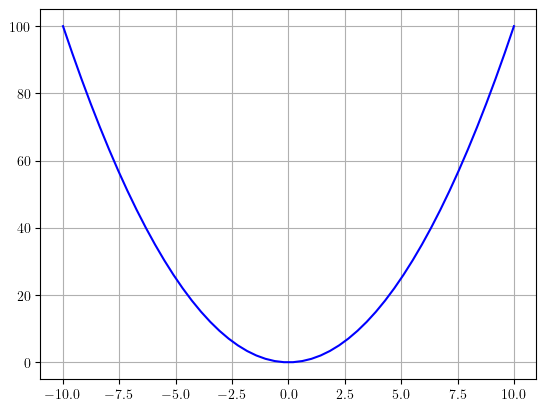

In [47]:
plotear(x, x * x)

evalúe también la función ```valor absoluto de x``` ($f(x)=|x|$) para el mismo dominio y ploteelo.

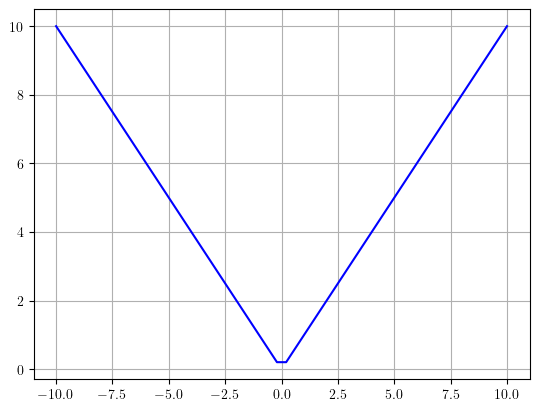

In [48]:
plotear(x, np.abs(x))

¿Qué ha sucedido en $x=0$? Inténtelo nuevamente pero haciendo un refinamiento de la discretización del dominio en el intervalo $[-1, 1]$ de tal forma que $\Delta x = 1e-2$.

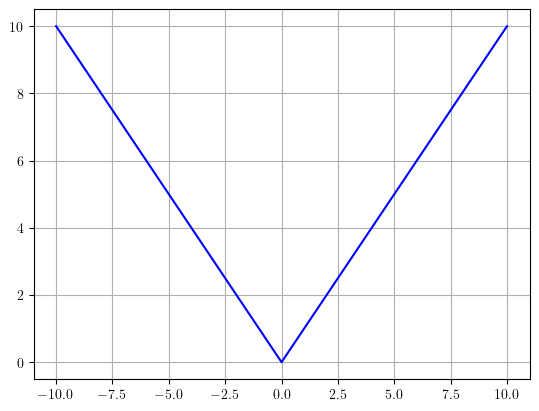

In [49]:
xl = np.linspace(-10, -1, 25)
dx = 1e-2
xref = np.arange(-1 + dx, 1, dx)
xr = np.linspace(1, 10, 25)

x = np.concatenate([xl, xref, xr])

plotear(x, np.abs(x))

Sea la matriz m:

In [50]:
m = np.array(
    [
        [11, 12, 13, 14, 15],
        [21, 22, 23, 24, 25],
        [31, 32, 33, 34, 35],
        [41, 42, 43, 44, 45],
        [51, 52, 53, 54, 55],
    ]
)
print("Matriz_ej:\n", m)

Matriz_ej:
 [[11 12 13 14 15]
 [21 22 23 24 25]
 [31 32 33 34 35]
 [41 42 43 44 45]
 [51 52 53 54 55]]


Invertir los elementos de las filas de la matriz

In [51]:
m[::, ::-1]

array([[15, 14, 13, 12, 11],
       [25, 24, 23, 22, 21],
       [35, 34, 33, 32, 31],
       [45, 44, 43, 42, 41],
       [55, 54, 53, 52, 51]])

Seleccinar solo las columnas impares

In [52]:
m[:, ::2]

array([[11, 13, 15],
       [21, 23, 25],
       [31, 33, 35],
       [41, 43, 45],
       [51, 53, 55]])

¿Cuál sería el resultado de seleccionar solo las columnas pares, las filas impares a partir ```i>1``` y ```1<=j<=4```?

In [53]:
m[2::2, 1::2]

array([[32, 34],
       [52, 54]])

Implemente la regla de Cramer para la resolución de sistemas de ecuaciones compatibles determinados de tamaño $2\times2$.

Sea un sistema $A x = b$ entonces la regla de Cramer señala que la solución a la incógnita $x_k$ del sistema, cuyos coeficientes están en la columna $k$-ésima de $A$ es:

$
x_k = \frac{|A_k|}{|A|}
$
donde $|.|$ denota el determinante de una matriz y $A_k$ la matriz $A$ *sustituyendo* la columna $k$-ésima por el vector b.

In [54]:
def Cramer(A, b):
    """
    Resuelve un sistema de ecuaciones lineales utilizando la regla de Cramer.

    Parameters:
    - A: Matriz de coeficientes del sistema de ecuaciones.
    - b: Vector de términos independientes.

    Returns:
    - x: Vector que contiene las soluciones del sistema.
    """
    if A.shape[0] != A.shape[1]:
        raise ValueError(
            "La matriz A debe ser cuadrada para aplicar la regla de Cramer."
        )

    detA = A[0, 0] * A[1, 1] - A[1, 0] * A[0, 1]

    if np.isclose(detA, 0):
        raise ValueError("ERROR! El sistema no es compatible determinado.")

    xk = np.empty(2)

    Ak0 = np.empty(A.shape)
    Ak0[:, 0] = b
    Ak0[:, 1] = A[:, 1]

    detAk0 = Ak0[0, 0] * Ak0[1, 1] - Ak0[1, 0] * Ak0[0, 1]
    xk[0] = detAk0 / detA

    Ak1 = np.empty(A.shape)
    Ak1[:, 0] = A[:, 0]
    Ak1[:, 1] = b

    detAk1 = Ak1[0, 0] * Ak1[1, 1] - Ak1[1, 0] * Ak1[0, 1]
    xk[1] = detAk1 / detA

    return xk

Resuelva el sistema de ecuaciones:

$
\begin{cases}
      x - 3 y &= 2  \\
      x + 5 y &= 10 \\ 
     \end{cases}
$

cuyas soluciones son: $x=5$ y $y=1$.

In [55]:
A = np.array([[1, -3], [1, 5]])
b = np.array([2, 10])

x = Cramer(A, b)
print(x)

[5. 1.]


¿Que pasaría si el sistema fuese:
$
\begin{cases}
      -x + 3 y &= 2  \\
      x + 5 y &= 10 \\ 
     \end{cases}
$
?

In [56]:
A = np.array([[-1, 3], [1, 5]])
b = np.array([2, 10])

x = Cramer(A, b)
print(x)

[2.5 1.5]
